<a href="https://colab.research.google.com/github/ddihora1604/ML_MINI/blob/main/Final_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Librarires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pl

In [ ]:
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge,
    SGDRegressor,
    HuberRegressor,
    TheilSenRegressor,
    RANSACRegressor,
    PassiveAggressiveRegressor
)

from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    BaggingRegressor,
    AdaBoostRegressor,
    VotingRegressor
)

from sklearn.neighbors import KNeighborsRegressor


In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error,
    explained_variance_score,
    make_scorer
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import (
    cross_validate,
    GridSearchCV,
    train_test_split,
)
from sklearn.inspection import permutation_importance

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML P/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.isnull() .sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isnull() .sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


###Assumption
###Sleep Hours in 1 Day
###Attendance and Marks in Range 0 - 100
###Tutoring_Session and Physical Activity 1-> 1 hour
###Hours Studied can be greater than 24

In [ ]:
anomalies = df[
    (df['Exam_Score'] < 0) | (df['Exam_Score'] > 100) |
    (df['Previous_Scores'] < 0) | (df['Previous_Scores'] > 100) |
    (df['Attendance'] < 0) | (df['Attendance'] > 100) |
    ((df['Sleep_Hours'] + df['Tutoring_Sessions'] + df['Physical_Activity']) > 24) |
    (df['Hours_Studied'] < 0)
]


df = df.drop(anomalies.index)
print(f"Number of rows dropped: {len(anomalies)}")

Number of rows dropped: 1


###EDA


### Distribution of parental involvement

In [ ]:
# 1. Separate categorical and numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


In [ ]:
unique_values = df[categorical_cols].apply(lambda x: x.unique())
print(unique_values)

Parental_Involvement                           [Low, Medium, High]
Access_to_Resources                            [High, Medium, Low]
Extracurricular_Activities                               [No, Yes]
Motivation_Level                               [Low, Medium, High]
Internet_Access                                          [Yes, No]
Family_Income                                  [Low, Medium, High]
Teacher_Quality                                [Medium, High, Low]
School_Type                                      [Public, Private]
Peer_Influence                       [Positive, Negative, Neutral]
Learning_Disabilities                                    [No, Yes]
Parental_Education_Level      [High School, College, Postgraduate]
Distance_from_Home                           [Near, Moderate, Far]
Gender                                              [Male, Female]
dtype: object


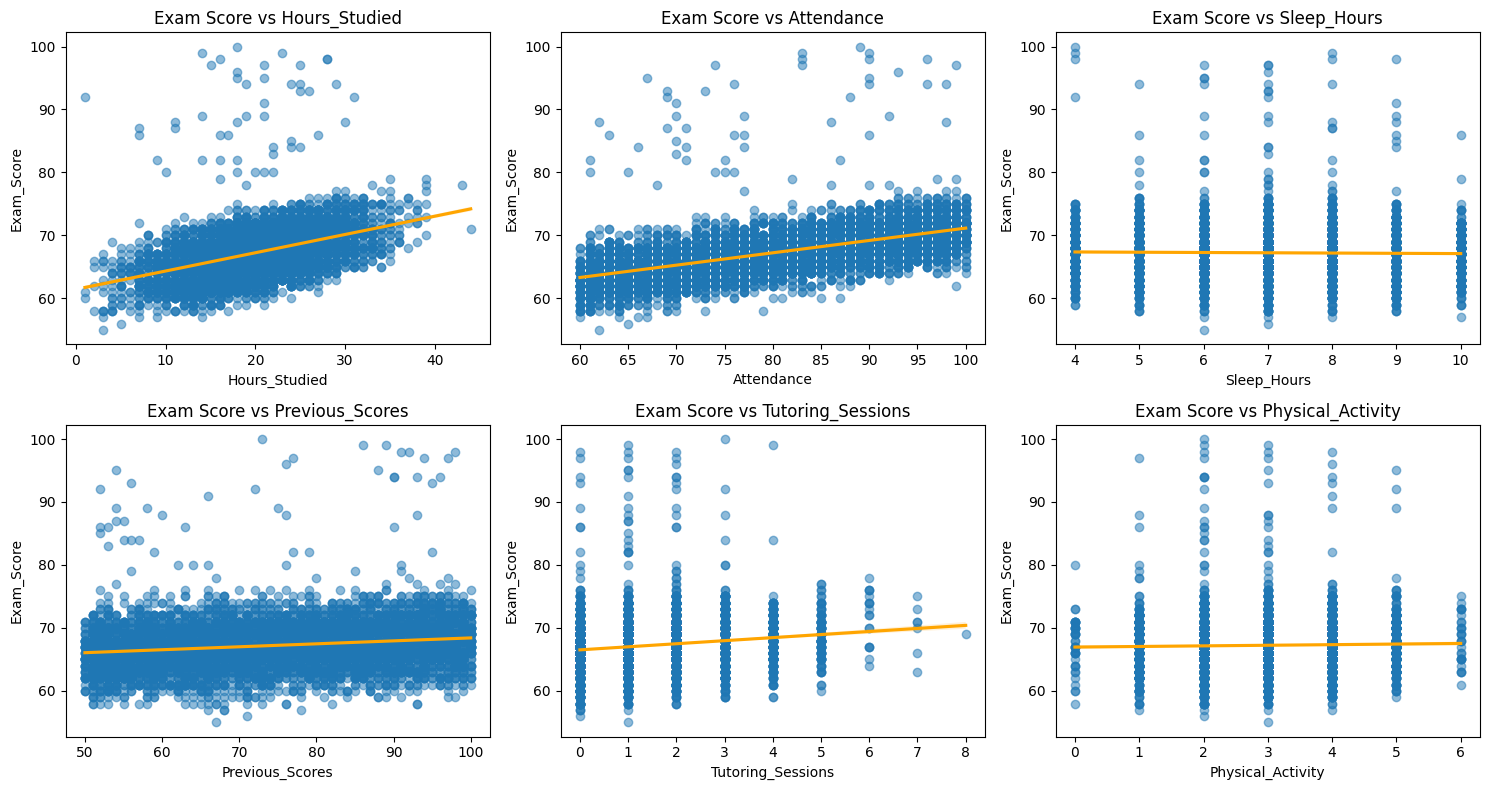

In [ ]:
def plot_numerical_vs_exam_score(df, exam_col, numerical_cols):
    numerical_cols = numerical_cols.drop(exam_col)
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, var in enumerate(numerical_cols):
        sns.regplot(x=df[var], y=df[exam_col], ax=axes[i], scatter_kws={'alpha': 0.5}, line_kws={'color': 'orange'})
        axes[i].set_title(f'Exam Score vs {var}')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_numerical_vs_exam_score(df, 'Exam_Score', numerical_cols)

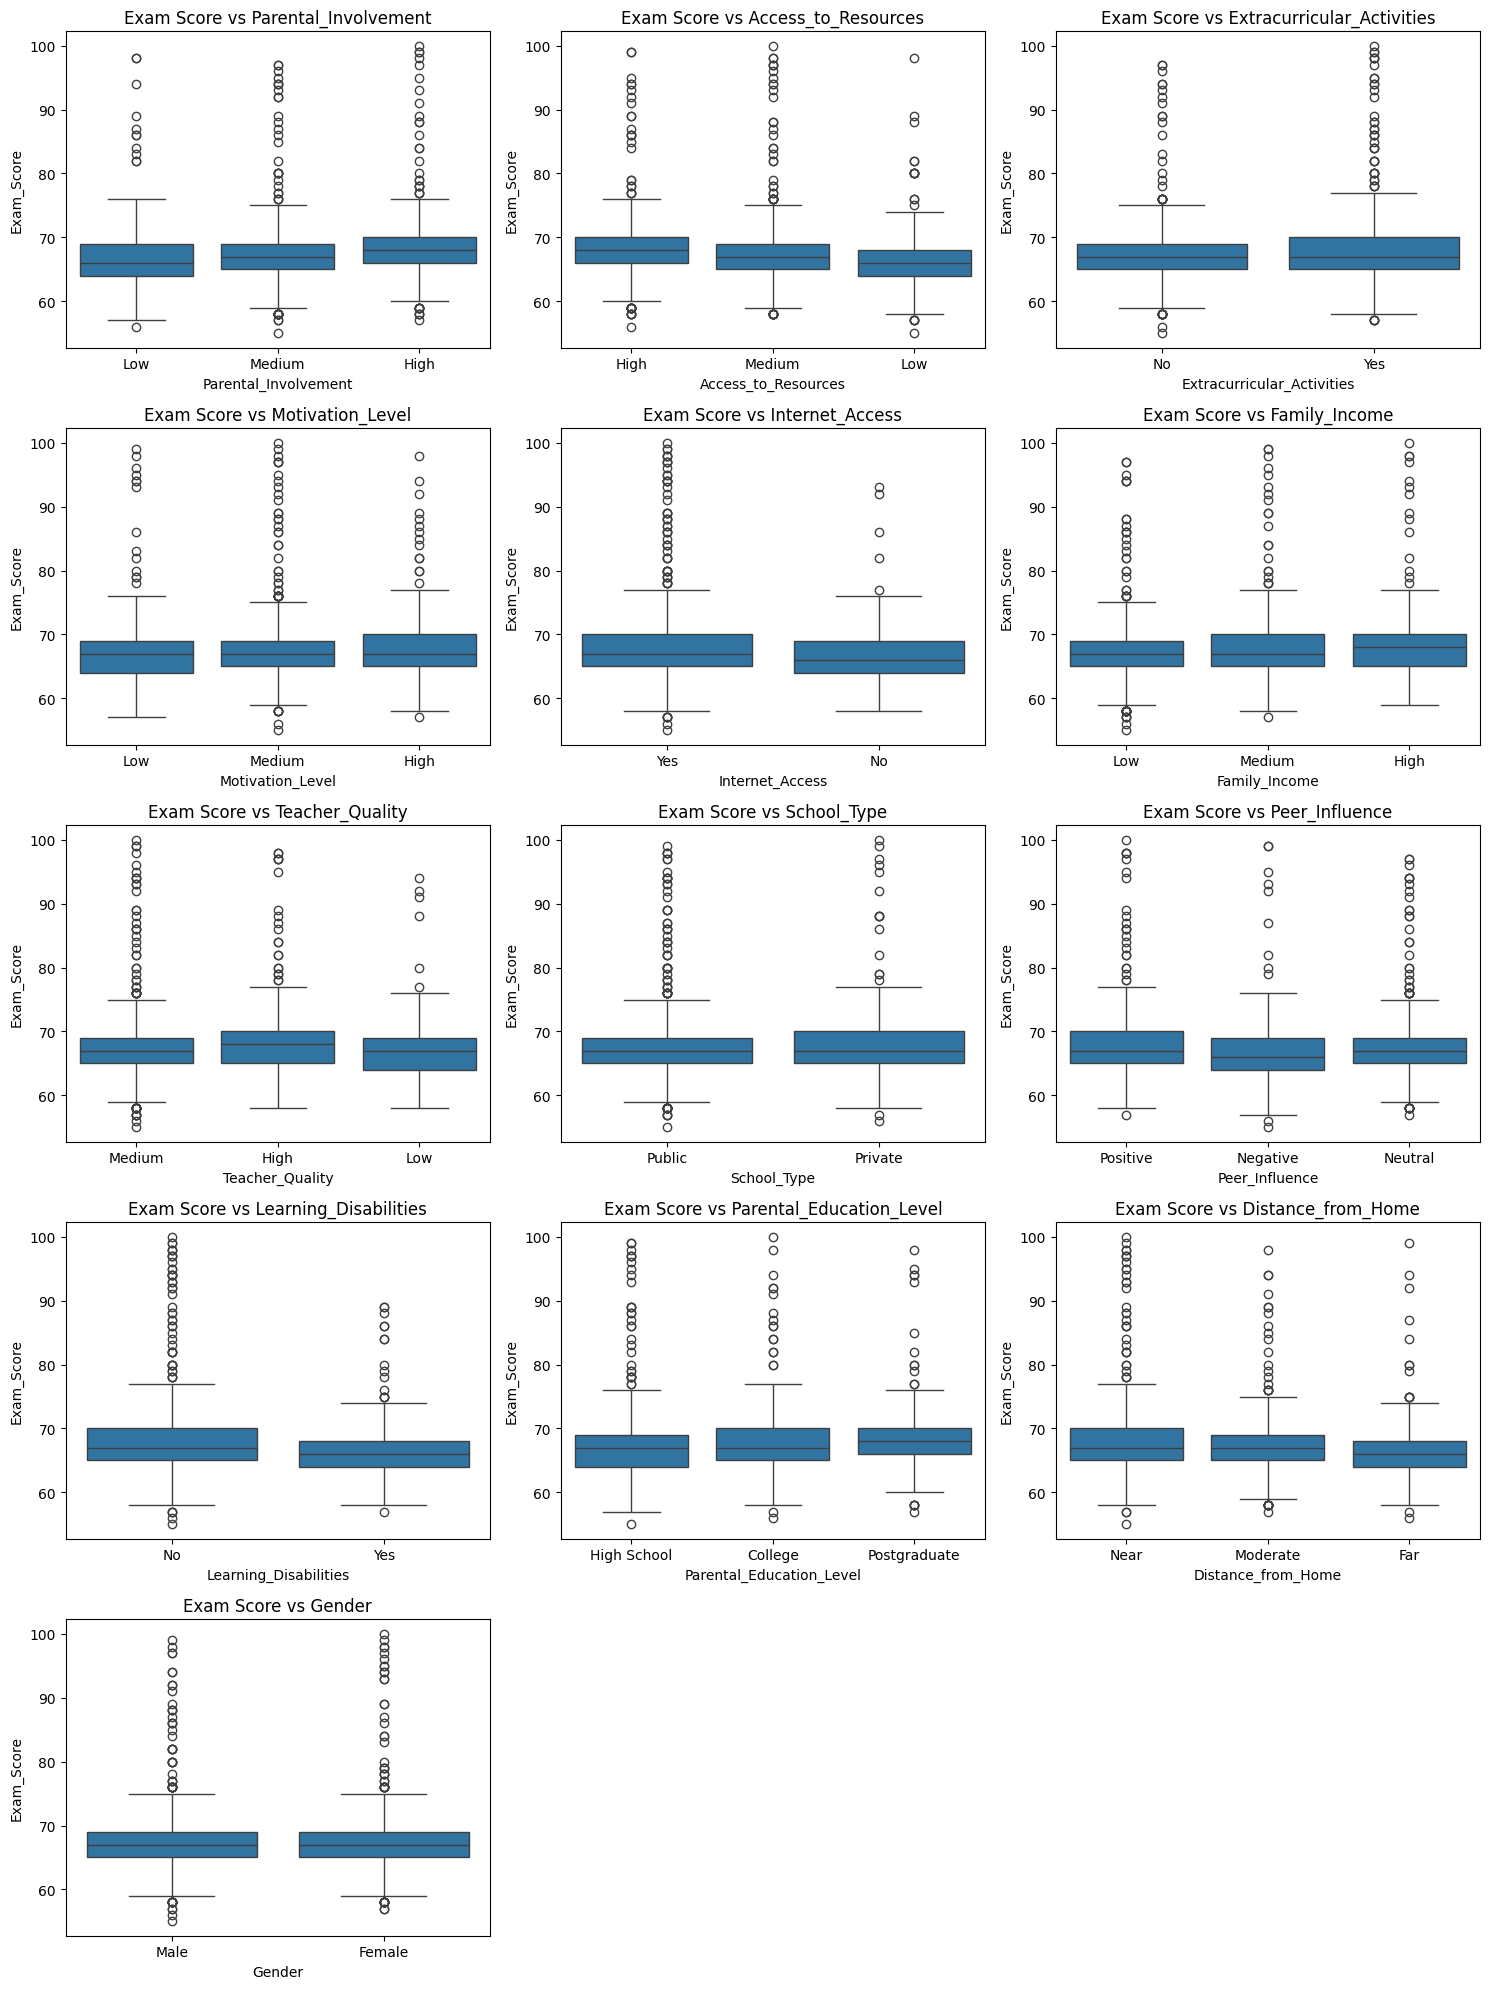

In [ ]:
def plot_categorical_vs_exam_score(df, exam_col, categorical_cols):
    n_cols = 3
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, var in enumerate(categorical_cols):
        sns.boxplot(x=df[var], y=df[exam_col], ax=axes[i])
        axes[i].set_title(f'Exam Score vs {var}')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_categorical_vs_exam_score(df, 'Exam_Score', categorical_cols)

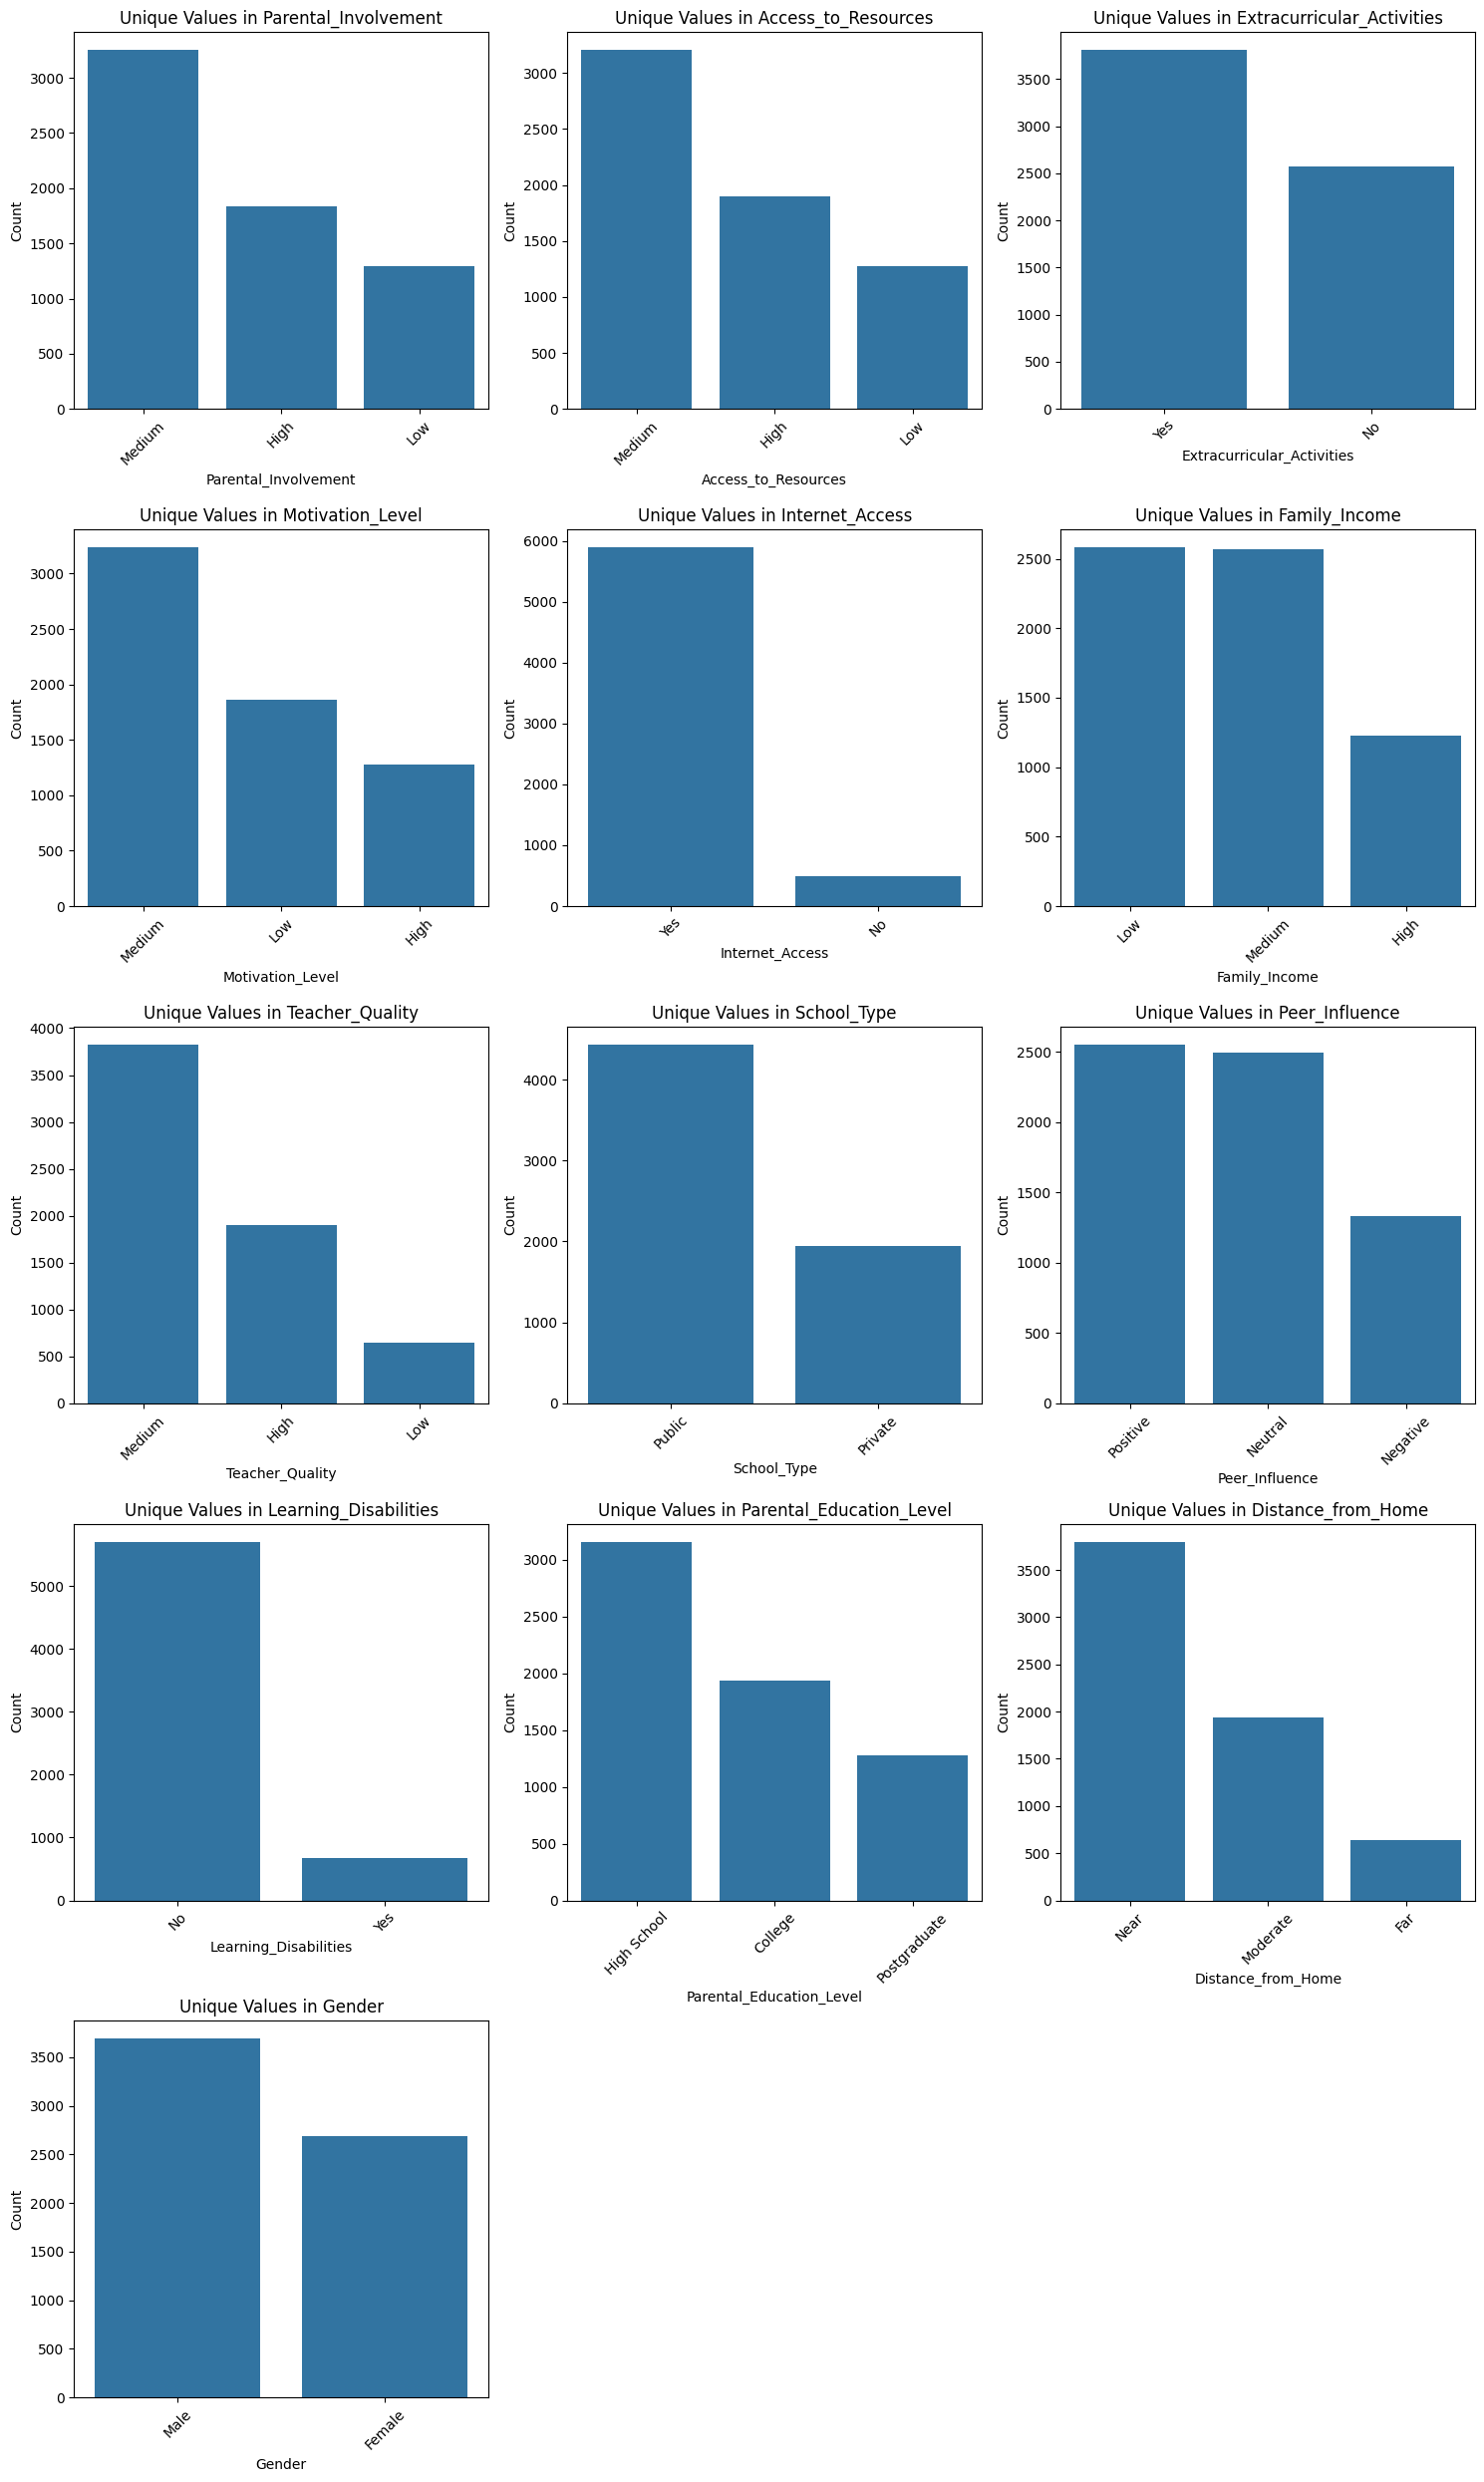

In [ ]:
def plot_unique_values_in_categorical(df, categorical_cols):
    n_cols = 3
    plt.figure(figsize=(15, 5 * (len(categorical_cols) // n_cols + len(categorical_cols) % n_cols)))

    for i, column in enumerate(categorical_cols):
        plt.subplot((len(categorical_cols) // n_cols + len(categorical_cols) % n_cols), n_cols, i + 1)
        unique_values = df[column].value_counts()
        sns.barplot(x=unique_values.index, y=unique_values.values)
        plt.title(f'Unique Values in {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_unique_values_in_categorical(df, categorical_cols)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Loop through the columns and apply LabelEncoder
for column in categorical_cols:
    df[f'{column}_encoded'] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Motivation_Level_encoded,Internet_Access_encoded,Family_Income_encoded,Teacher_Quality_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded,Gender_encoded
0,23,84,Low,High,No,7,73,Low,Yes,0,...,1,1,1,2,1,2,0,1,2,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,1,1,2,2,1,0,0,0,1,0
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,2,1,2,2,1,1,0,2,2,1
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,2,1,2,2,1,0,0,1,1,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,2,1,2,0,1,1,0,0,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6606
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Hours_Studied                       6377 non-null   int64 
 1   Attendance                          6377 non-null   int64 
 2   Parental_Involvement                6377 non-null   object
 3   Access_to_Resources                 6377 non-null   object
 4   Extracurricular_Activities          6377 non-null   object
 5   Sleep_Hours                         6377 non-null   int64 
 6   Previous_Scores                     6377 non-null   int64 
 7   Motivation_Level                    6377 non-null   object
 8   Internet_Access                     6377 non-null   object
 9   Tutoring_Sessions                   6377 non-null   int64 
 10  Family_Income                       6377 non-null   object
 11  Teacher_Quality                     6377 non-null   object
 1

###Feature Engineering



##  Correlation Martix between columns


In [ ]:
df_encoded = df.drop(columns=['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Hours_Studied                       6377 non-null   int64
 1   Attendance                          6377 non-null   int64
 2   Sleep_Hours                         6377 non-null   int64
 3   Previous_Scores                     6377 non-null   int64
 4   Tutoring_Sessions                   6377 non-null   int64
 5   Physical_Activity                   6377 non-null   int64
 6   Exam_Score                          6377 non-null   int64
 7   Parental_Involvement_encoded        6377 non-null   int64
 8   Access_to_Resources_encoded         6377 non-null   int64
 9   Extracurricular_Activities_encoded  6377 non-null   int64
 10  Motivation_Level_encoded            6377 non-null   int64
 11  Internet_Access_encoded             6377 non-null   int64
 12  Family_Inco

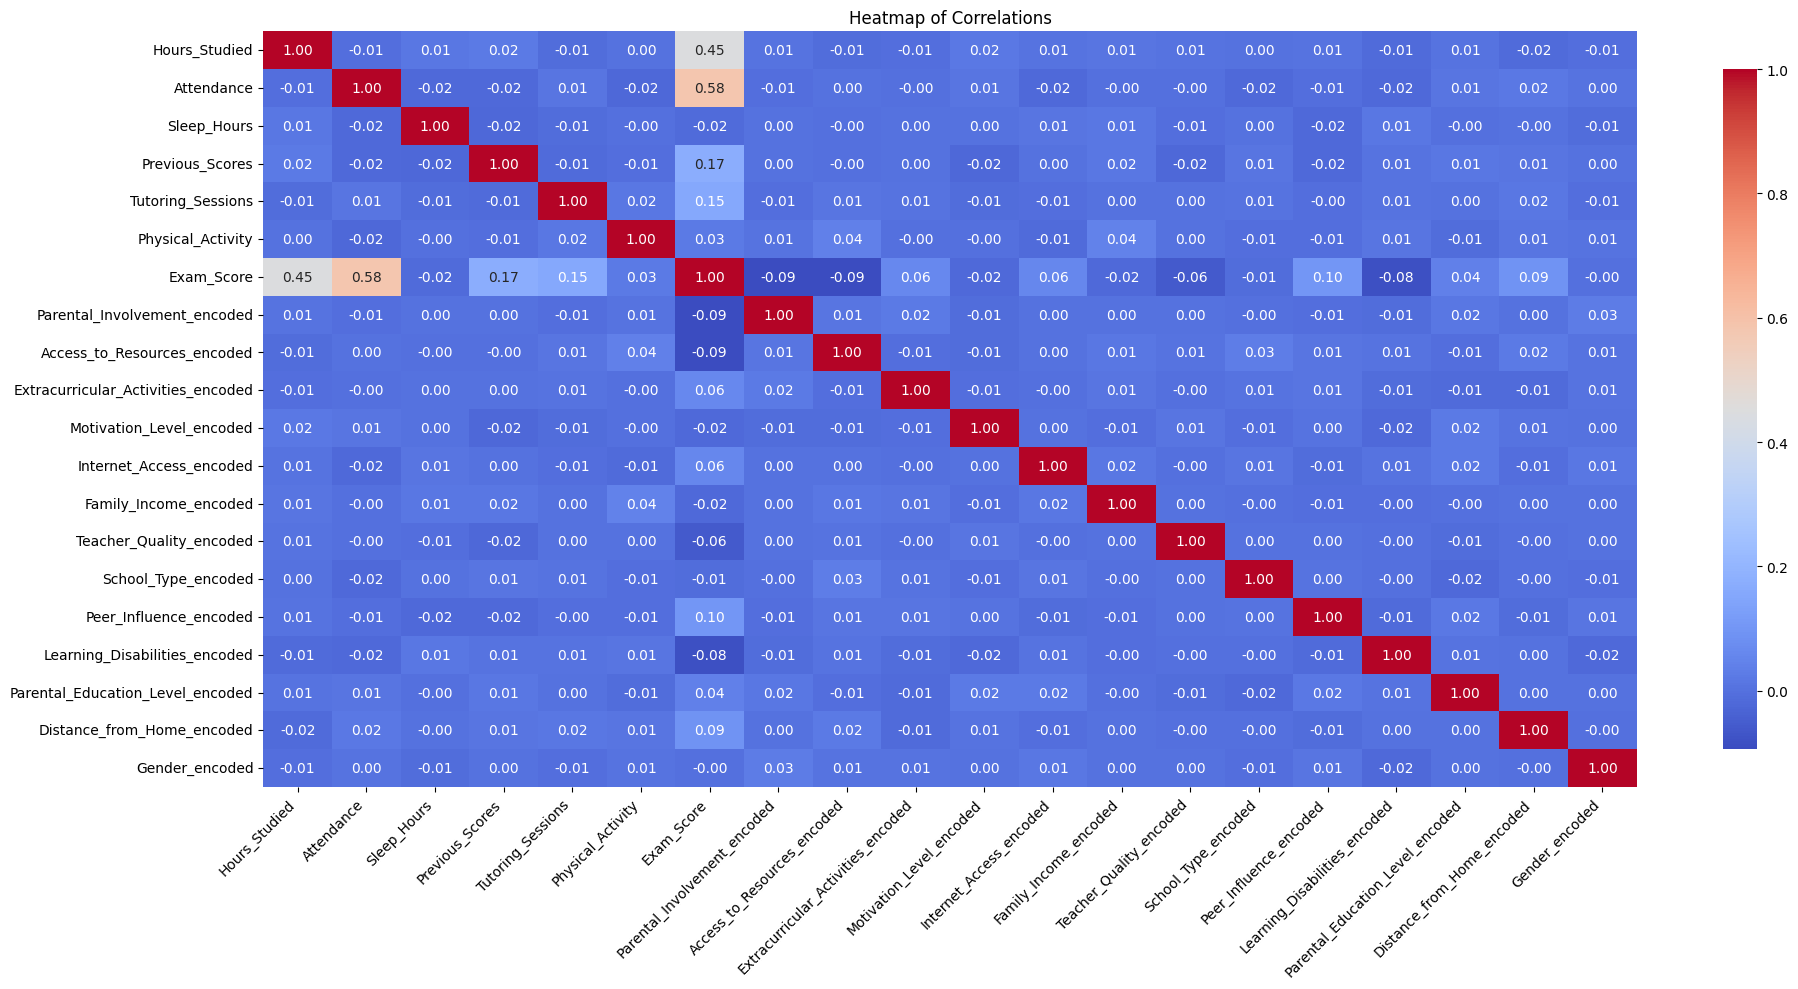

In [ ]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=False, cbar_kws={"shrink": .9})
plt.title('Heatmap of Correlations')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Removed column having correlation with Exam Score less than 0.05

In [ ]:
df = df_encoded.drop(['Gender_encoded', 'School_Type_encoded','Sleep_Hours','Family_Income_encoded', 'Motivation_Level_encoded','Physical_Activity','Parental_Education_Level_encoded'], axis=1)
df.columns = df.columns.str.replace('_encoded', '')
exam_score = df.pop('Exam_Score')
df['Exam_Score'] = exam_score
df.head(10)

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Internet_Access,Teacher_Quality,Peer_Influence,Learning_Disabilities,Distance_from_Home,Exam_Score
0,23,84,73,0,1,0,0,1,2,2,0,2,67
1,19,64,59,2,1,2,0,1,2,0,0,1,61
2,24,98,91,2,2,2,1,1,2,1,0,2,74
3,29,89,98,1,1,2,1,1,2,0,0,1,71
4,19,92,65,3,2,2,1,1,0,1,0,2,70
5,19,88,89,3,2,2,1,1,2,2,0,2,71
6,29,84,68,1,2,1,1,1,2,1,0,1,67
7,25,78,50,1,1,0,1,1,0,0,0,0,66
8,17,94,80,0,2,0,0,1,1,1,0,2,69
9,23,98,71,0,2,2,1,1,0,2,0,1,72


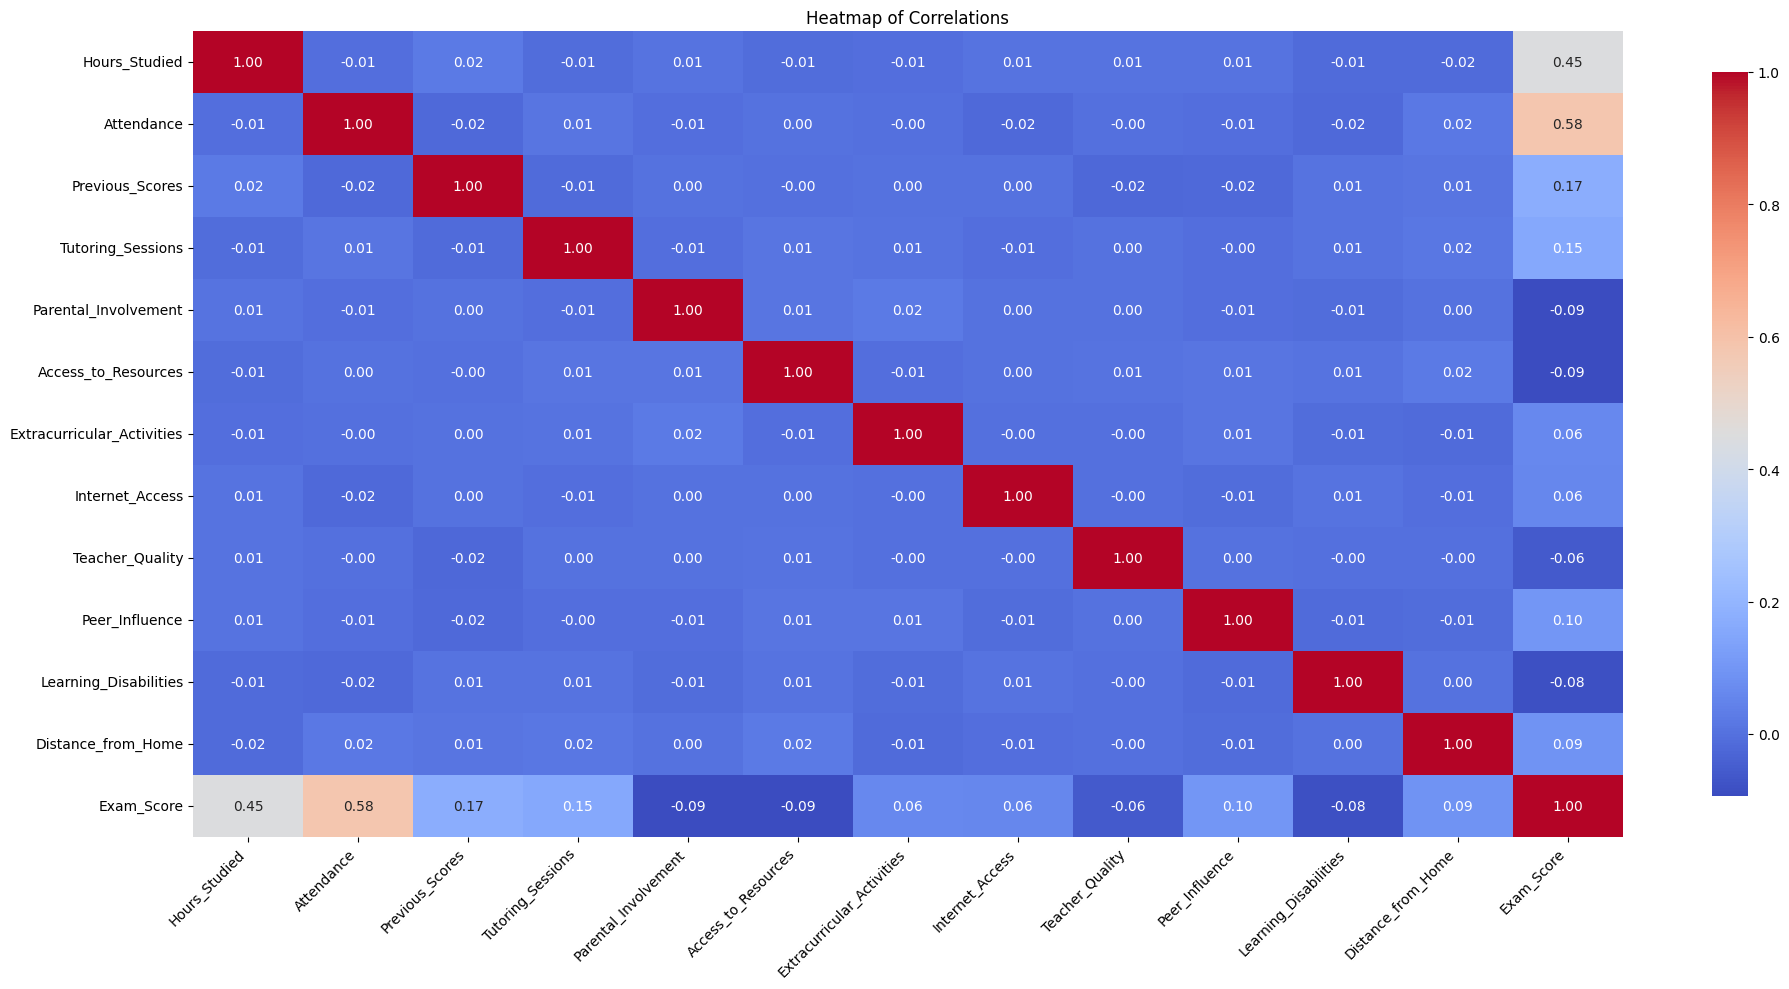

In [ ]:
cor_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=False, cbar_kws={"shrink": .9})
plt.title('Heatmap of Correlations')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df.head()
df.shape

(6377, 13)

6607 -> 6377 ; 20 -> 13

In [ ]:
Y = df['Exam_Score']
X = df.drop('Exam_Score', axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifiers = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    BayesianRidge(),
    SGDRegressor(),
    HuberRegressor(),
    TheilSenRegressor(),
    RANSACRegressor(),
    PassiveAggressiveRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    BaggingRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor()
]

use polynomial features and votingregressor

## Without StandardScaler

In [ ]:
results = {}

for model in classifiers:
    model_name = model.__class__.__name__
    print(f"\nTraining {model_name}...")

    # Define custom scoring metrics
    scoring = {
        'MAE': 'neg_mean_absolute_error',
        'MSE': 'neg_mean_squared_error',
        'R2': 'r2',
        'MedAE': 'neg_median_absolute_error',
        'Explained_Variance': 'explained_variance'
    }

    # Perform cross-validation with the defined scoring
    scores = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

    # Fit the model on the training set
    model.fit(X_train, Y_train)

    # Predictions
    Y_pred = model.predict(X_test)

    # Evaluation on the test set
    r2 = r2_score(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    medae = median_absolute_error(Y_test, Y_pred)
    explained_variance = explained_variance_score(Y_test, Y_pred)

    # Store results, including cross-validation scores for each metric
    results[model_name] = {
        "CV R²": np.mean(scores['test_R2']),
        "Test R²": r2,
        "Test MAE": mae,
        "Test MSE": mse,
        "Test Median AE": medae,
        "Test Explained Variance": explained_variance,
        "CV MAE": np.mean(scores['test_MAE']),
        "CV MSE": np.mean(scores['test_MSE']),
        "CV Median AE": np.mean(scores['test_MedAE']),
        "CV Explained Variance": np.mean(scores['test_Explained_Variance'])
    }


Training LinearRegression...

Training Ridge...

Training Lasso...

Training ElasticNet...

Training BayesianRidge...

Training SGDRegressor...

Training HuberRegressor...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_


Training TheilSenRegressor...

Training RANSACRegressor...

Training PassiveAggressiveRegressor...

Training SVR...

Training DecisionTreeRegressor...

Training RandomForestRegressor...

Training GradientBoostingRegressor...

Training ExtraTreesRegressor...

Training BaggingRegressor...

Training AdaBoostRegressor...

Training KNeighborsRegressor...


In [ ]:
# Display results
for model_name, metrics in results.items():
    print(f"\nResults for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Results for LinearRegression:
CV R²: 0.6386
Test R²: 0.6688
Test MAE: 1.0751
Test MSE: 5.2553
Test Median AE: 0.7870
Test Explained Variance: 0.6688
CV MAE: -1.0989
CV MSE: -5.4408
CV Median AE: -0.7946
CV Explained Variance: 0.6388

Results for Ridge:
CV R²: 0.6386
Test R²: 0.6688
Test MAE: 1.0752
Test MSE: 5.2555
Test Median AE: 0.7884
Test Explained Variance: 0.6688
CV MAE: -1.0989
CV MSE: -5.4408
CV Median AE: -0.7948
CV Explained Variance: 0.6388

Results for Lasso:
CV R²: 0.5617
Test R²: 0.5875
Test MAE: 1.4323
Test MSE: 6.5452
Test Median AE: 1.0899
Test Explained Variance: 0.5877
CV MAE: -1.4450
CV MSE: -6.5820
CV Median AE: -1.1147
CV Explained Variance: 0.5619

Results for ElasticNet:
CV R²: 0.5731
Test R²: 0.6015
Test MAE: 1.3794
Test MSE: 6.3230
Test Median AE: 1.0143
Test Explained Variance: 0.6017
CV MAE: -1.3978
CV MSE: -6.4094
CV Median AE: -1.0748
CV Explained Variance: 0.5733

Results for BayesianRidge:
CV R²: 0.6386
Test R²: 0.6686
Test MAE: 1.0757
Test MSE: 5.2588


## With StandardScaler

In [ ]:
results_scaled = {}

for model in classifiers:
    model_name = model.__class__.__name__
    print(f"\nTraining {model_name} on scaled data...")

    # Define custom scoring metrics
    scoring = {
        'MAE': 'neg_mean_absolute_error',
        'MSE': 'neg_mean_squared_error',
        'R2': 'r2',
        'MedAE': 'neg_median_absolute_error',
        'Explained_Variance': 'explained_variance'
    }

    # Cross-validation on scaled data
    print(f"Cross-validating {model_name} on scaled data...")
    scores_scaled = cross_validate(model, X_train_scaled, Y_train, cv=5, scoring=scoring, return_train_score=True)

    # Fit the model on the scaled training set
    model.fit(X_train_scaled, Y_train)

    # Predictions on scaled test set
    Y_pred_scaled = model.predict(X_test_scaled)

    # Evaluation on scaled test set
    r2_scaled = r2_score(Y_test, Y_pred_scaled)
    mae_scaled = mean_absolute_error(Y_test, Y_pred_scaled)
    mse_scaled = mean_squared_error(Y_test, Y_pred_scaled)
    medae_scaled = median_absolute_error(Y_test, Y_pred_scaled)
    explained_variance_scaled = explained_variance_score(Y_test, Y_pred_scaled)

    # Store results for scaled data
    results_scaled[model_name] = {
        "CV R² (Scaled)": np.mean(scores_scaled['test_R2']),
        "Test R² (Scaled)": r2_scaled,
        "Test MAE (Scaled)": mae_scaled,
        "Test MSE (Scaled)": mse_scaled,
        "Test Median AE (Scaled)": medae_scaled,
        "Test Explained Variance (Scaled)": explained_variance_scaled,
        "CV MAE (Scaled)": np.mean(scores_scaled['test_MAE']),
        "CV MSE (Scaled)": np.mean(scores_scaled['test_MSE']),
        "CV Median AE (Scaled)": np.mean(scores_scaled['test_MedAE']),
        "CV Explained Variance (Scaled)": np.mean(scores_scaled['test_Explained_Variance'])
    }


Training LinearRegression on scaled data...
Cross-validating LinearRegression on scaled data...

Training Ridge on scaled data...
Cross-validating Ridge on scaled data...

Training Lasso on scaled data...
Cross-validating Lasso on scaled data...

Training ElasticNet on scaled data...
Cross-validating ElasticNet on scaled data...

Training BayesianRidge on scaled data...
Cross-validating BayesianRidge on scaled data...

Training SGDRegressor on scaled data...
Cross-validating SGDRegressor on scaled data...

Training HuberRegressor on scaled data...
Cross-validating HuberRegressor on scaled data...

Training TheilSenRegressor on scaled data...
Cross-validating TheilSenRegressor on scaled data...

Training RANSACRegressor on scaled data...
Cross-validating RANSACRegressor on scaled data...

Training PassiveAggressiveRegressor on scaled data...
Cross-validating PassiveAggressiveRegressor on scaled data...

Training SVR on scaled data...
Cross-validating SVR on scaled data...

Training Dec

In [ ]:
# Display results for scaled data
for model_name, metrics in results_scaled.items():
    print(f"\nResults for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Results for LinearRegression:
CV R² (Scaled): 0.6386
Test R² (Scaled): 0.6688
Test MAE (Scaled): 1.0751
Test MSE (Scaled): 5.2553
Test Median AE (Scaled): 0.7870
Test Explained Variance (Scaled): 0.6688
CV MAE (Scaled): -1.0989
CV MSE (Scaled): -5.4408
CV Median AE (Scaled): -0.7946
CV Explained Variance (Scaled): 0.6388

Results for Ridge:
CV R² (Scaled): 0.6386
Test R² (Scaled): 0.6688
Test MAE (Scaled): 1.0752
Test MSE (Scaled): 5.2556
Test Median AE (Scaled): 0.7869
Test Explained Variance (Scaled): 0.6688
CV MAE (Scaled): -1.0989
CV MSE (Scaled): -5.4408
CV Median AE (Scaled): -0.7945
CV Explained Variance (Scaled): 0.6388

Results for Lasso:
CV R² (Scaled): 0.4048
Test R² (Scaled): 0.3978
Test MAE (Scaled): 1.9992
Test MSE (Scaled): 9.5551
Test Median AE (Scaled): 1.5794
Test Explained Variance (Scaled): 0.3982
CV MAE (Scaled): -1.9553
CV MSE (Scaled): -8.9682
CV Median AE (Scaled): -1.5380
CV Explained Variance (Scaled): 0.4049

Results for ElasticNet:
CV R² (Scaled): 0.4165
Te

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


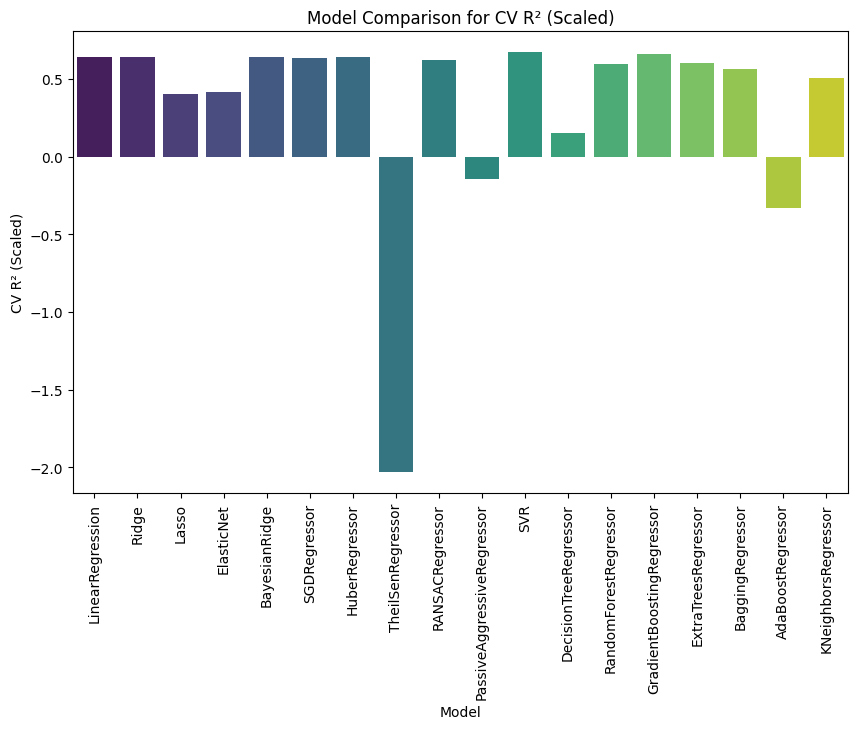

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


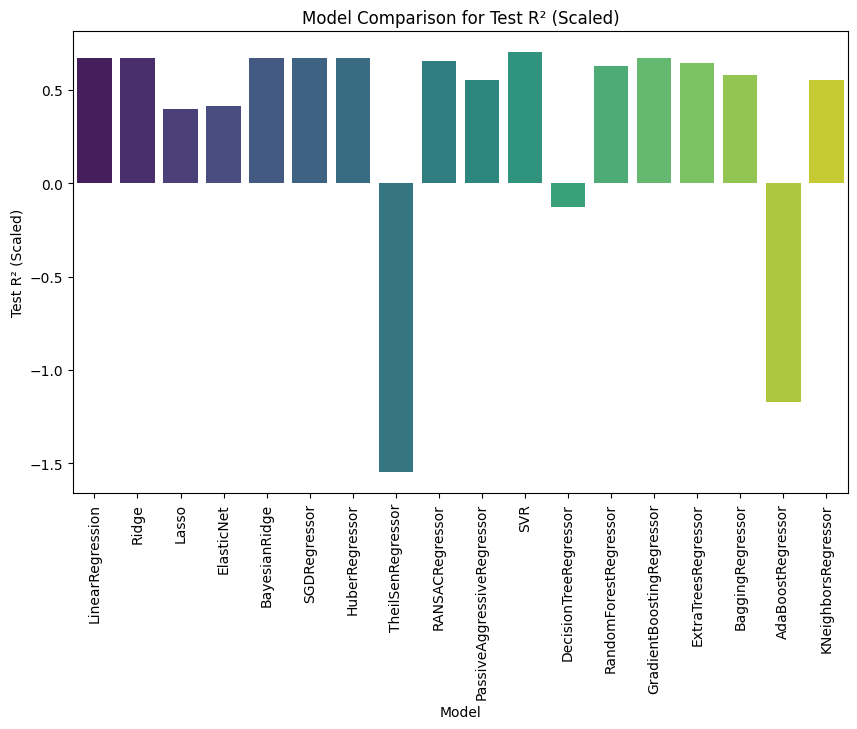

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


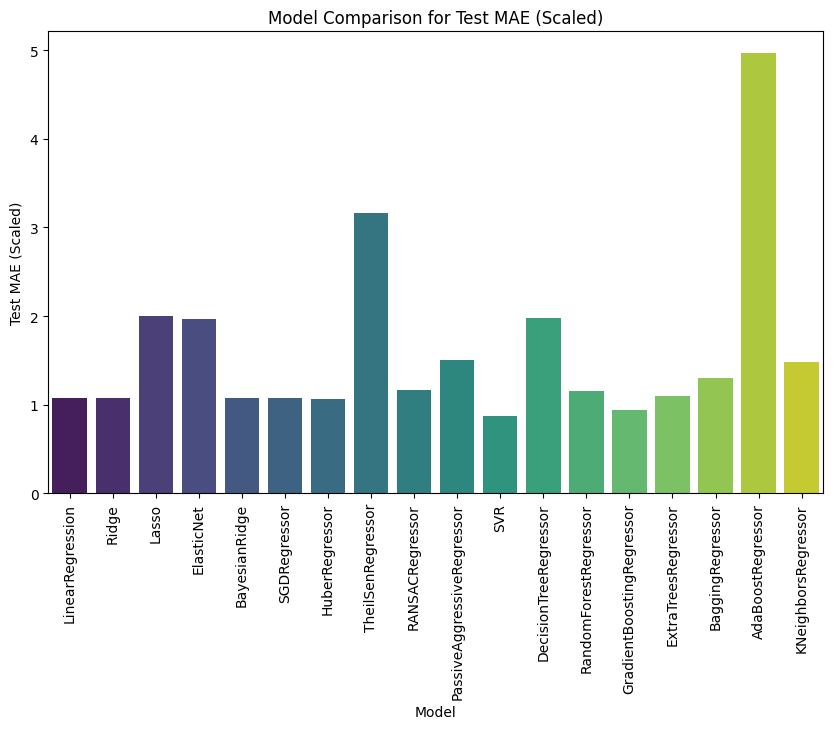

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


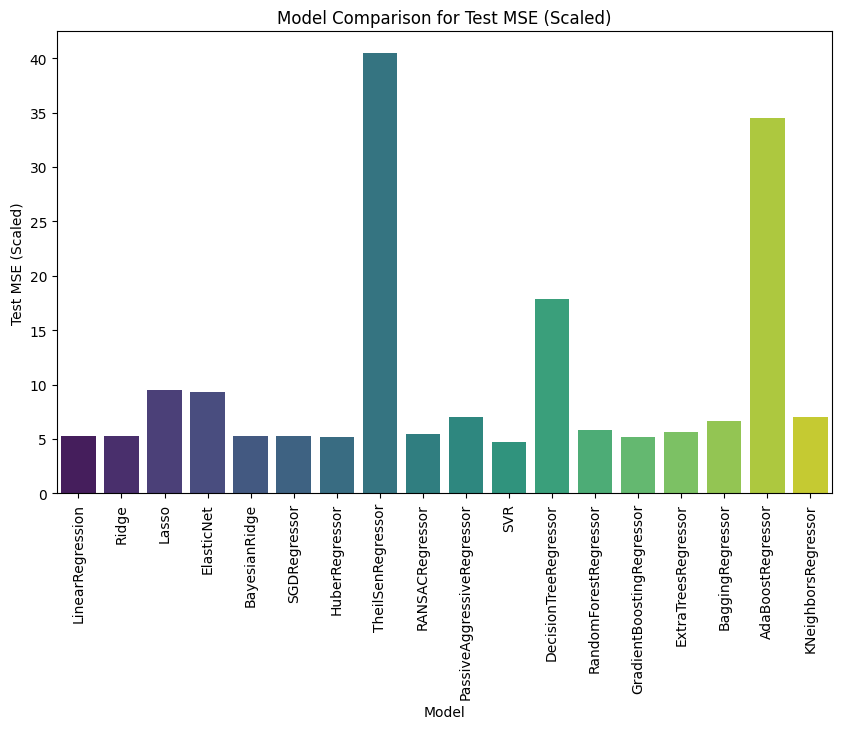

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


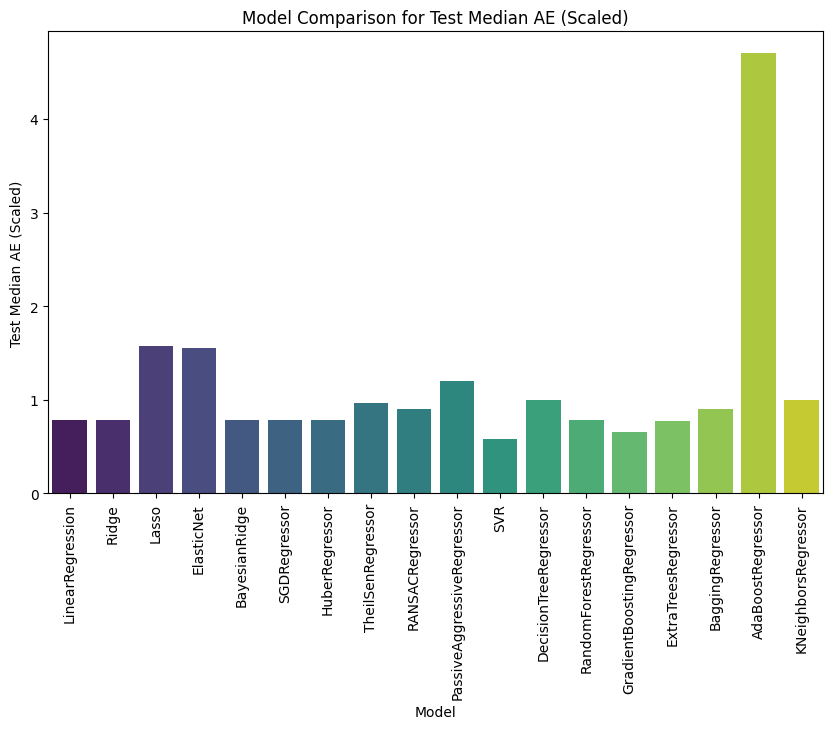

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


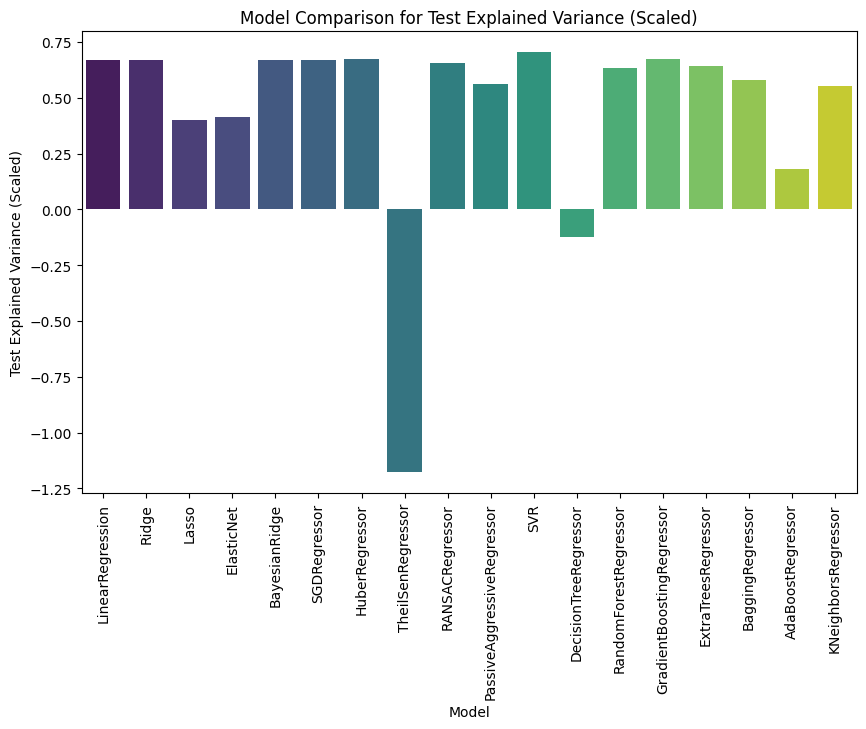

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


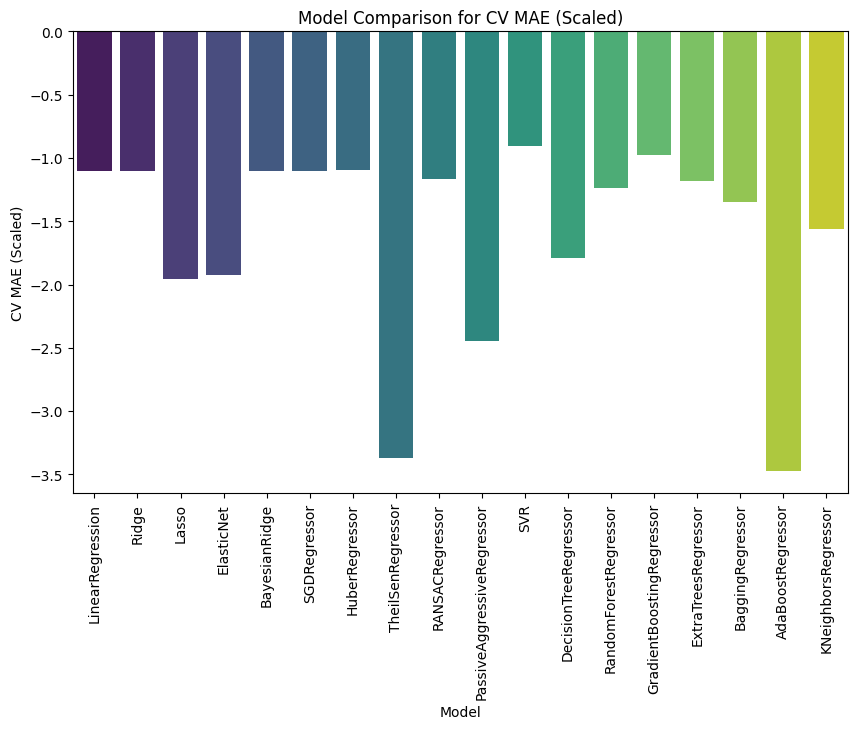

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


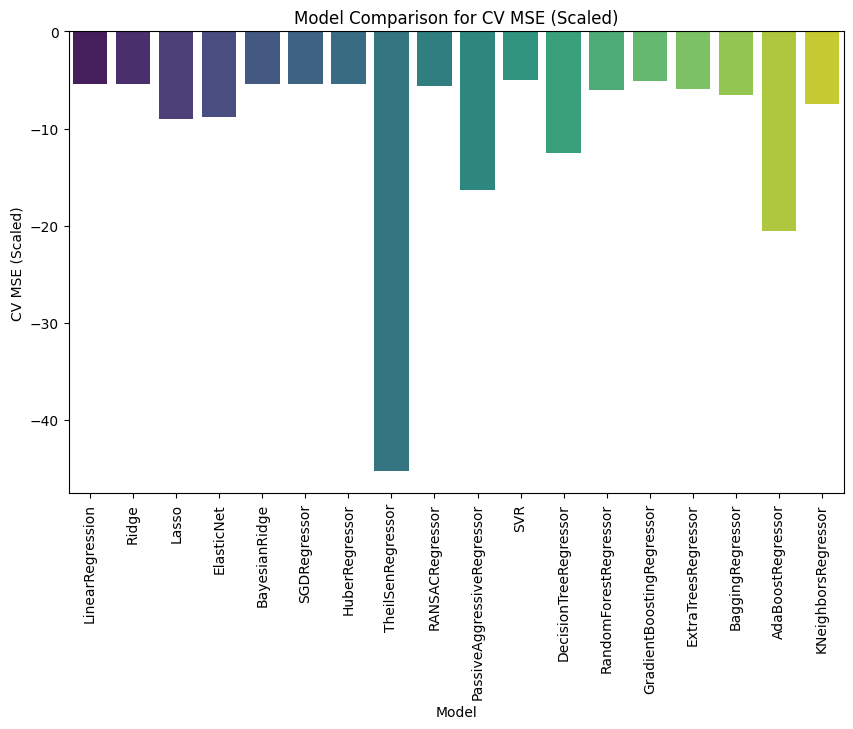

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


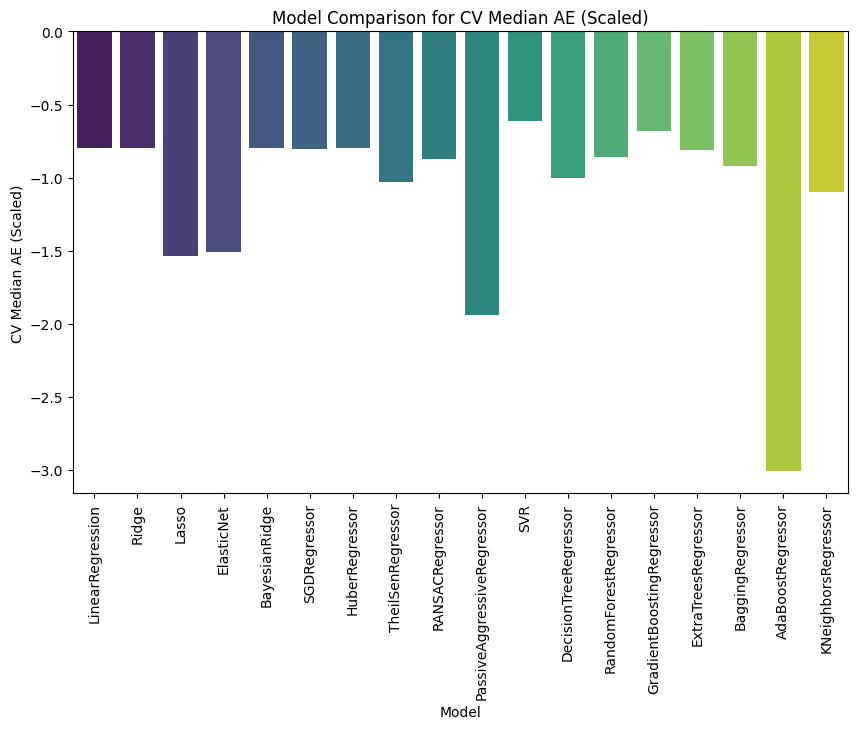

<ipython-input-98-29827d4e6e0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


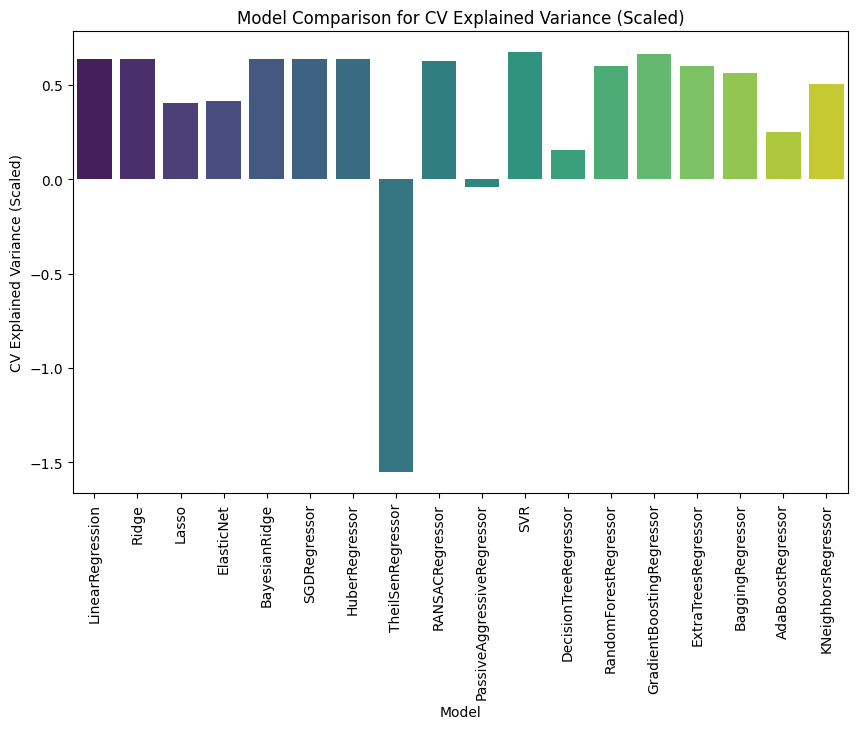

In [ ]:
results_df = pd.DataFrame(results_scaled).T

results_df = results_df.reset_index().rename(columns={'index': 'Model'})

metrics = ["CV R² (Scaled)","Test R² (Scaled)","Test MAE (Scaled)","Test MSE (Scaled)","Test Median AE (Scaled)","Test Explained Variance (Scaled)","CV MAE (Scaled)","CV MSE (Scaled)","CV Median AE (Scaled)","CV Explained Variance (Scaled)"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'Model Comparison for {metric}')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index').astype(float)
print("Without Standard Scaler")
results_df.head(18)

Without Standard Scaler


,CV R²,Test R²,Test MAE,Test MSE,Test Median AE,Test Explained Variance,CV MAE,CV MSE,CV Median AE,CV Explained Variance
LinearRegression,6.386000e-01,6.688000e-01,1.075100e+00,5.255300e+00,7.870000e-01,6.688000e-01,-1.098900e+00,-5.440800e+00,-7.946000e-01,6.388000e-01
Ridge,6.386000e-01,6.688000e-01,1.075200e+00,5.255500e+00,7.884000e-01,6.688000e-01,-1.098900e+00,-5.440800e+00,-7.948000e-01,6.388000e-01
Lasso,5.617000e-01,5.875000e-01,1.432300e+00,6.545200e+00,1.089900e+00,5.877000e-01,-1.445000e+00,-6.582000e+00,-1.114700e+00,5.619000e-01
ElasticNet,5.731000e-01,6.015000e-01,1.379400e+00,6.323000e+00,1.014300e+00,6.017000e-01,-1.397800e+00,-6.409400e+00,-1.074800e+00,5.733000e-01
BayesianRidge,6.386000e-01,6.686000e-01,1.075700e+00,5.258800e+00,7.914000e-01,6.686000e-01,-1.099700e+00,-5.441200e+00,-7.969000e-01,6.388000e-01
SGDRegressor,-2.912723e+23,-4.200995e+23,2.557905e+12,6.665796e+24,2.561840e+12,-7.746626e+21,-1.961261e+12,-4.383459e+24,-1.959010e+12,-1.019590e+22
HuberRegressor,-1.398000e-01,-3.160000e-02,2.234300e+00,1.636830e+01,1.233400e+00,1.450000e-02,-2.290300e+00,-1.701890e+01,-1.312000e+00,-8.450000e-02
TheilSenRegressor,4.036000e-01,4.924000e-01,1.455600e+00,8.053700e+00,8.604000e-01,5.114000e-01,-1.531000e+00,-8.909000e+00,-8.931000e-01,4.324000e-01
RANSACRegressor,6.287000e-01,6.634000e-01,1.117200e+00,5.340700e+00,8.011000e-01,6.642000e-01,-1.151800e+00,-5.590200e+00,-8.485000e-01,6.311000e-01
PassiveAggressiveRegressor,-8.489400e+00,2.315000e-01,2.567600e+00,1.219470e+01,2.122800e+00,2.380000e-01,-7.713400e+00,-1.421394e+02,-7.402800e+00,-3.471000e-01


In [ ]:
results_scaled_df = pd.DataFrame.from_dict(results_scaled, orient='index').astype(float)
print("With Standard Scaler")
results_scaled_df.head(18)

With Standard Scaler


,CV R² (Scaled),Test R² (Scaled),Test MAE (Scaled),Test MSE (Scaled),Test Median AE (Scaled),Test Explained Variance (Scaled),CV MAE (Scaled),CV MSE (Scaled),CV Median AE (Scaled),CV Explained Variance (Scaled)
LinearRegression,0.638613,0.668793,1.075128,5.255321,0.786989,0.668826,-1.098920,-5.440837,-0.794640,0.638825
Ridge,0.638615,0.668779,1.075180,5.255550,0.786928,0.668811,-1.098945,-5.440829,-0.794469,0.638826
Lasso,0.404845,0.397807,1.999177,9.555101,1.579361,0.398163,-1.955319,-8.968212,-1.537957,0.404926
ElasticNet,0.416450,0.412036,1.962848,9.329334,1.557765,0.412331,-1.924277,-8.787883,-1.506956,0.416535
BayesianRidge,0.638623,0.668695,1.075476,5.256882,0.788273,0.668728,-1.099086,-5.440787,-0.794068,0.638833
SGDRegressor,0.637296,0.669261,1.072185,5.247900,0.782269,0.669475,-1.102951,-5.459570,-0.802020,0.637590
HuberRegressor,0.638739,0.672055,1.068469,5.203555,0.786675,0.672439,-1.091210,-5.437508,-0.799357,0.639569
TheilSenRegressor,-2.034281,-1.548813,3.159921,40.442481,0.966785,-1.178327,-3.372318,-45.341014,-1.027083,-1.554336
RANSACRegressor,0.623320,0.655634,1.164087,5.464122,0.903582,0.655703,-1.169360,-5.666076,-0.871207,0.626034
PassiveAggressiveRegressor,-0.146142,0.554367,1.506697,7.070934,1.198698,0.561958,-2.445055,-16.357178,-1.941606,-0.038261


## Comparing Feature Importance Across Models

Extracting feature importance for LinearRegression...
Extracting feature importance for Ridge...
Extracting feature importance for Lasso...
Extracting feature importance for ElasticNet...
Extracting feature importance for BayesianRidge...
Extracting feature importance for SGDRegressor...
Extracting feature importance for HuberRegressor...
Extracting feature importance for TheilSenRegressor...
Extracting feature importance for RANSACRegressor...
Extracting feature importance for PassiveAggressiveRegressor...
Extracting feature importance for SVR...
Extracting feature importance for DecisionTreeRegressor...
Extracting feature importance for RandomForestRegressor...
Extracting feature importance for GradientBoostingRegressor...
Extracting feature importance for ExtraTreesRegressor...
Extracting feature importance for BaggingRegressor...
Extracting feature importance for AdaBoostRegressor...
Extracting feature importance for KNeighborsRegressor...


<Figure size 1200x800 with 0 Axes>

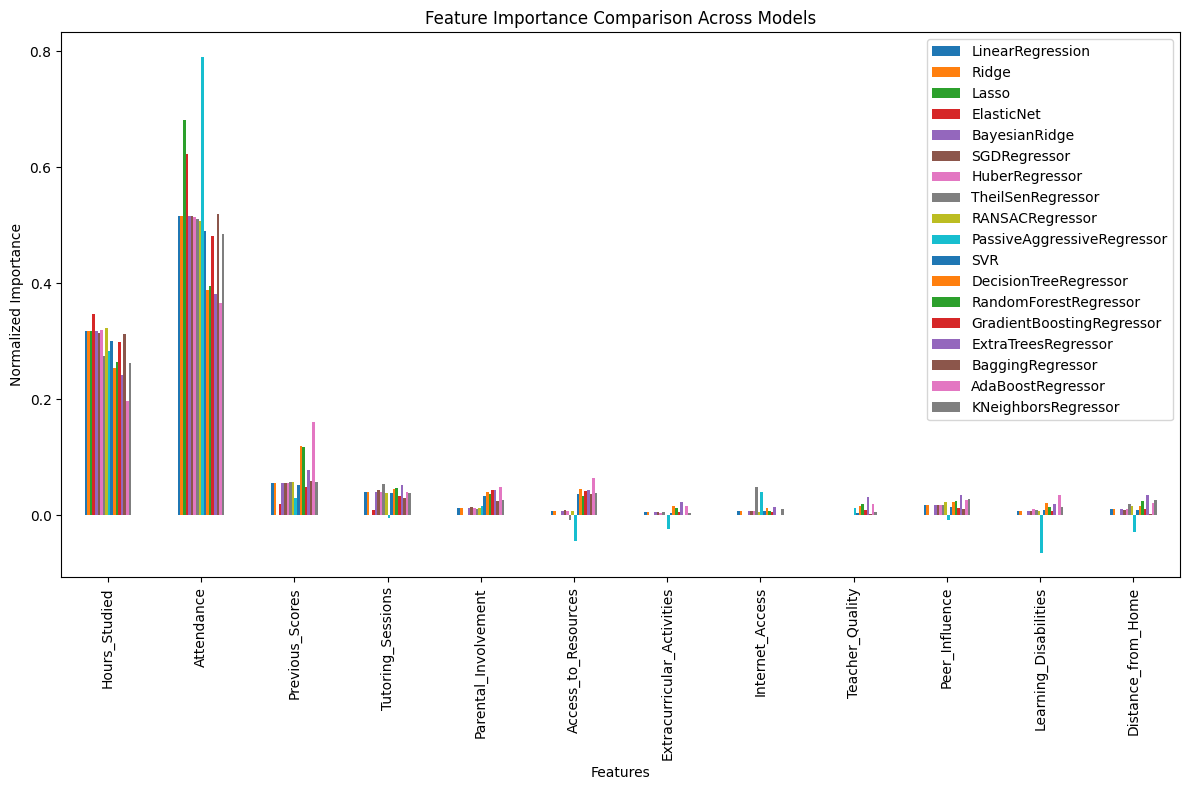

In [ ]:
# Function to normalize importance values
def normalize_importance(importances):
    return importances / np.sum(importances)

# Function to extract feature importance
def get_feature_importance(model, X_train, X_test, y_train, y_test, model_name):
    try:
        # For models with native feature importance
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        else:
            # For models without native feature importance, use permutation importance
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
            importances = result.importances_mean

        # Normalize the importances for comparison
        normalized_importances = normalize_importance(importances)
        return normalized_importances
    except Exception as e:
        print(f"Could not compute feature importance for {model_name}: {e}")
        return None

# Initialize dictionary to hold feature importances from each model
feature_importance_comparison = {}

# Compute and store feature importances for each model
for model in classifiers:
    model_name = model.__class__.__name__
    print(f"Extracting feature importance for {model_name}...")

    # Train the model if not already trained
    model.fit(X_train_scaled, Y_train)

    # Get the importance values
    importances = get_feature_importance(model, X_train_scaled, X_test_scaled, Y_train, Y_test, model_name)

    if importances is not None:
        feature_importance_comparison[model_name] = importances

# Create a DataFrame for comparison
feature_importance_df = pd.DataFrame(feature_importance_comparison, index=X_train.columns)

# Plot comparison of feature importances across all models
plt.figure(figsize=(12, 8))
feature_importance_df.plot(kind='bar', figsize=(12, 8))
plt.title("Feature Importance Comparison Across Models")
plt.xlabel("Features")
plt.ylabel("Normalized Importance")
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
